# <b>Multiple Linear Regression - Bike Sharing Assignment

## Problem Statement

**Overview:**  
BoomBikes, a US-based bike-sharing provider, has experienced a significant drop in revenue due to the COVID-19 pandemic. To recover, they aim to devise a business strategy by understanding the factors influencing the demand for shared bikes post-pandemic.  

**Objective:**  
- Identify the key variables affecting bike demand.
- Develop a model to predict demand based on these variables.  


#### <b>Flow of code :
1. Reading , understaing and visualizing data
    - Modifying data as per Data Dictionary
2. Preparing the data for modeling
    - Creating Dummies
    - Train-Test splitting
    - Feature scaling
3. Model Building
    - Training the model on train dataset
    - Using RFE(Recursive Feature Elimination)
4. Residual analysis
5. Making prediction on the test set
6. Model Evaluation 

# Step 1- Reading, understanding and visualizing data

In [1]:
# importing warning and necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd

# pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


>## Modifying the Data as per Data Dictionary
>> - There are several categorical columns that contains numerical value that can mislead our analysis
>> - So to prevent this we will convert them to string value

In [6]:
# Checking the season column
data.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [7]:
# Converting season column's values into string 

def func(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x==3:
        return 'Fall'
    else:
        return 'Winter'

data['season'] =data['season'].apply(func)

In [8]:
# Checking that conversion is done properly or not
data.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [9]:
# Checking for weathersit column
data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [10]:
# Converting weathersit column's values into string 
# A	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# B	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# C	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# D	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

def func(x):
    if x == 1:
        return 'A'
    elif x == 2:
        return 'B'
    elif x==3:
        return 'C'
    elif x==4:
        return 'D'

data['weathersit'] =data['weathersit'].apply(func)

In [11]:
# Checking that conversion is done properly or not
data.weathersit.value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [12]:
# Converting weekday column's value into string

def func(x):
    if x==6:
        return 'Mon'
    elif x==7:
        return 'Tue'
    elif x==1:
        return 'Wed'
    elif x==2:
        return 'Thu'
    elif x==3:
        return 'Fri'
    elif x==4:
        return 'Sat'
    elif x==5:
        return 'Sun'

data.weekday = data.weekday.apply(func)

In [13]:
# Checking that conversion is done properly or not
data.weekday.value_counts()

weekday
Wed    105
Thu    105
Fri    104
Sat    104
Sun    104
Mon    104
Name: count, dtype: int64

In [14]:
# Converting mnth column's value into string
data.mnth = data.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                           7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [15]:
# Checking that conversion is done properly or not
data.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

>## Visualizing Data

In [16]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

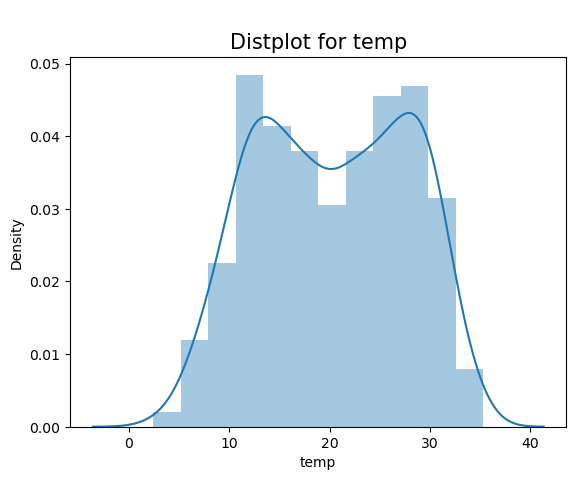

In [17]:
# Visualizing Numerical Data
num = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.distplot(data['temp'])
plt.title(("\nDistplot for temp"),fontsize=15)
plt.show() 

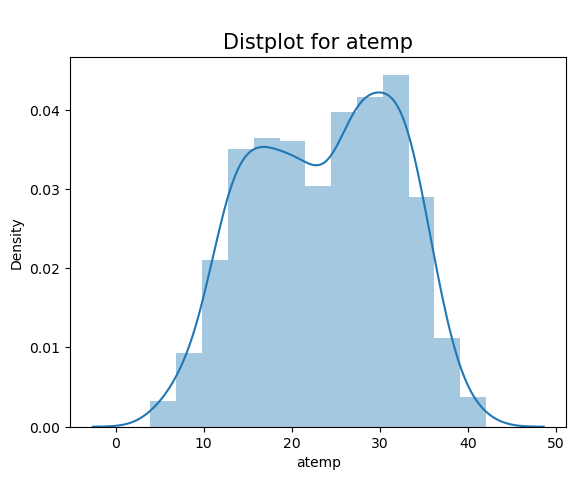

In [18]:
# Visualizing Numerical Data
sns.distplot(data['atemp'])
plt.title(("\nDistplot for atemp"),fontsize=15)
plt.show() 

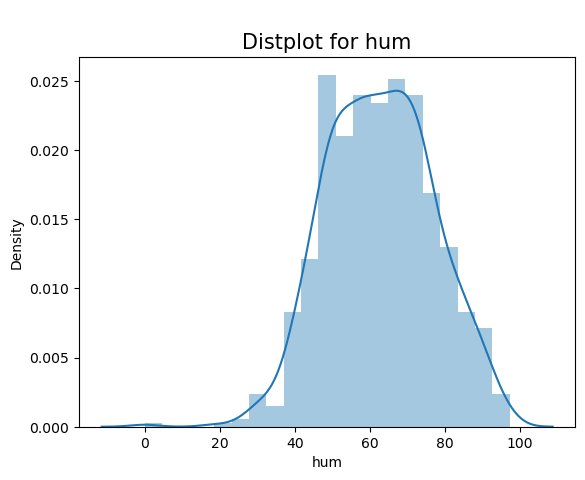

In [19]:
# Visualizing Numerical Data
sns.distplot(data['hum'])
plt.title(("\nDistplot for hum"),fontsize=15)
plt.show() 

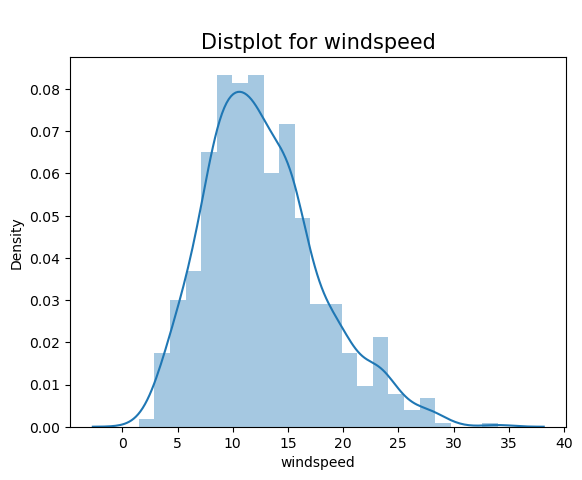

In [20]:
# Visualizing Numerical Data
sns.distplot(data['windspeed'])
plt.title(("\nDistplot for windspeed"),fontsize=15)
plt.show() 

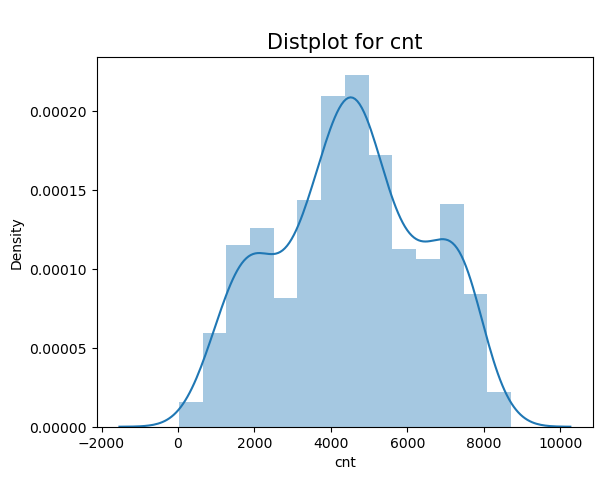

In [21]:
# Visualizing Numerical Data
sns.distplot(data['cnt'])
plt.title(("\nDistplot for cnt"),fontsize=15)
plt.show() 

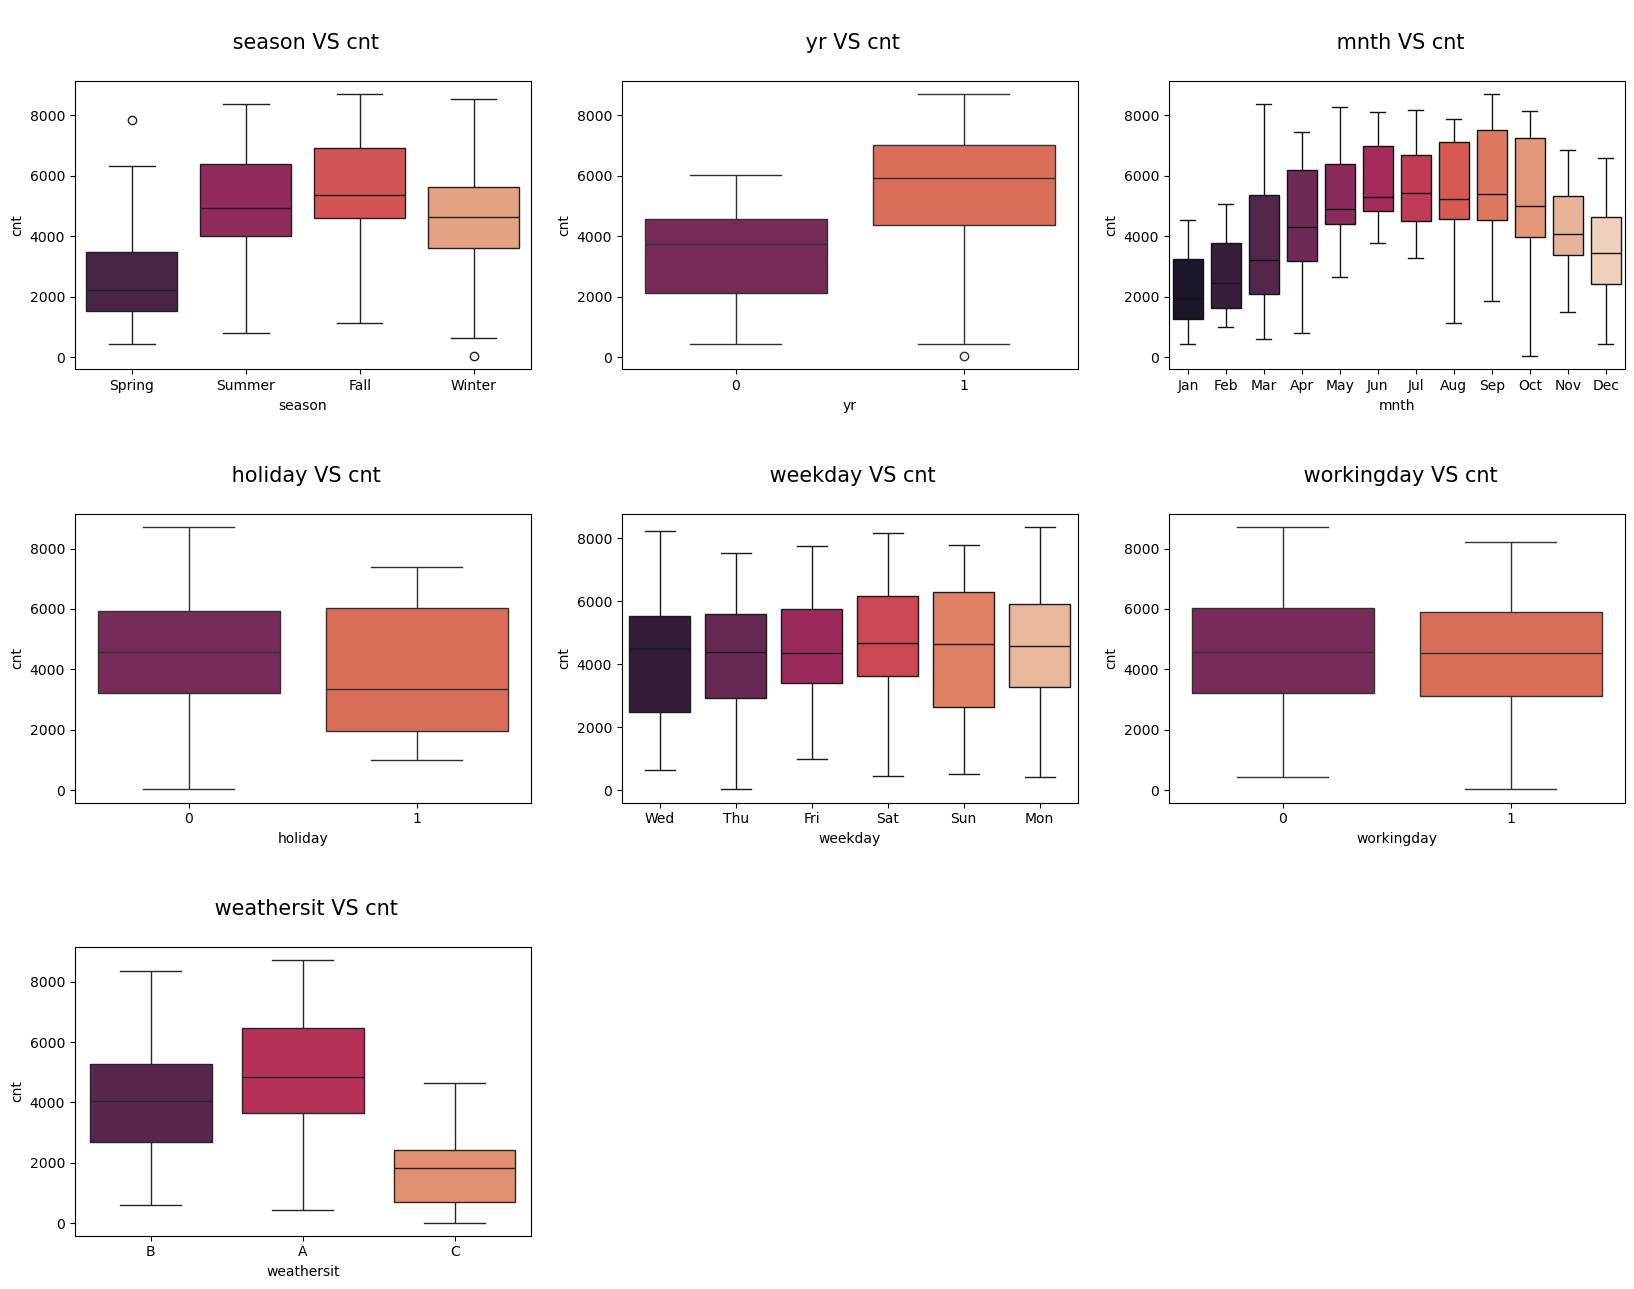

In [22]:
# Visualizing Categorical Data
cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 15))
for i,j in enumerate(cat):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=j ,y='cnt', data=data, palette='rocket')
    plt.title(("\n "+j+" VS cnt\n"),fontsize=15)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

>>## Observations:
>>> - The count of bikes rented is lesser in Spring as compared to other seasons
>>> - The count of bikes rented is significantly higher in 2019 compared to 2018
>>> - The count of bikes rented gradually increases from January to September, reaching a peak in September. Then, the count decreases steadily until December.
>>> - The median count of bikes rented is significantly lower on holidays 
>>> - Very few bikes taken for rental for weathersit C (i.e. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

<Figure size 1000x1000 with 0 Axes>

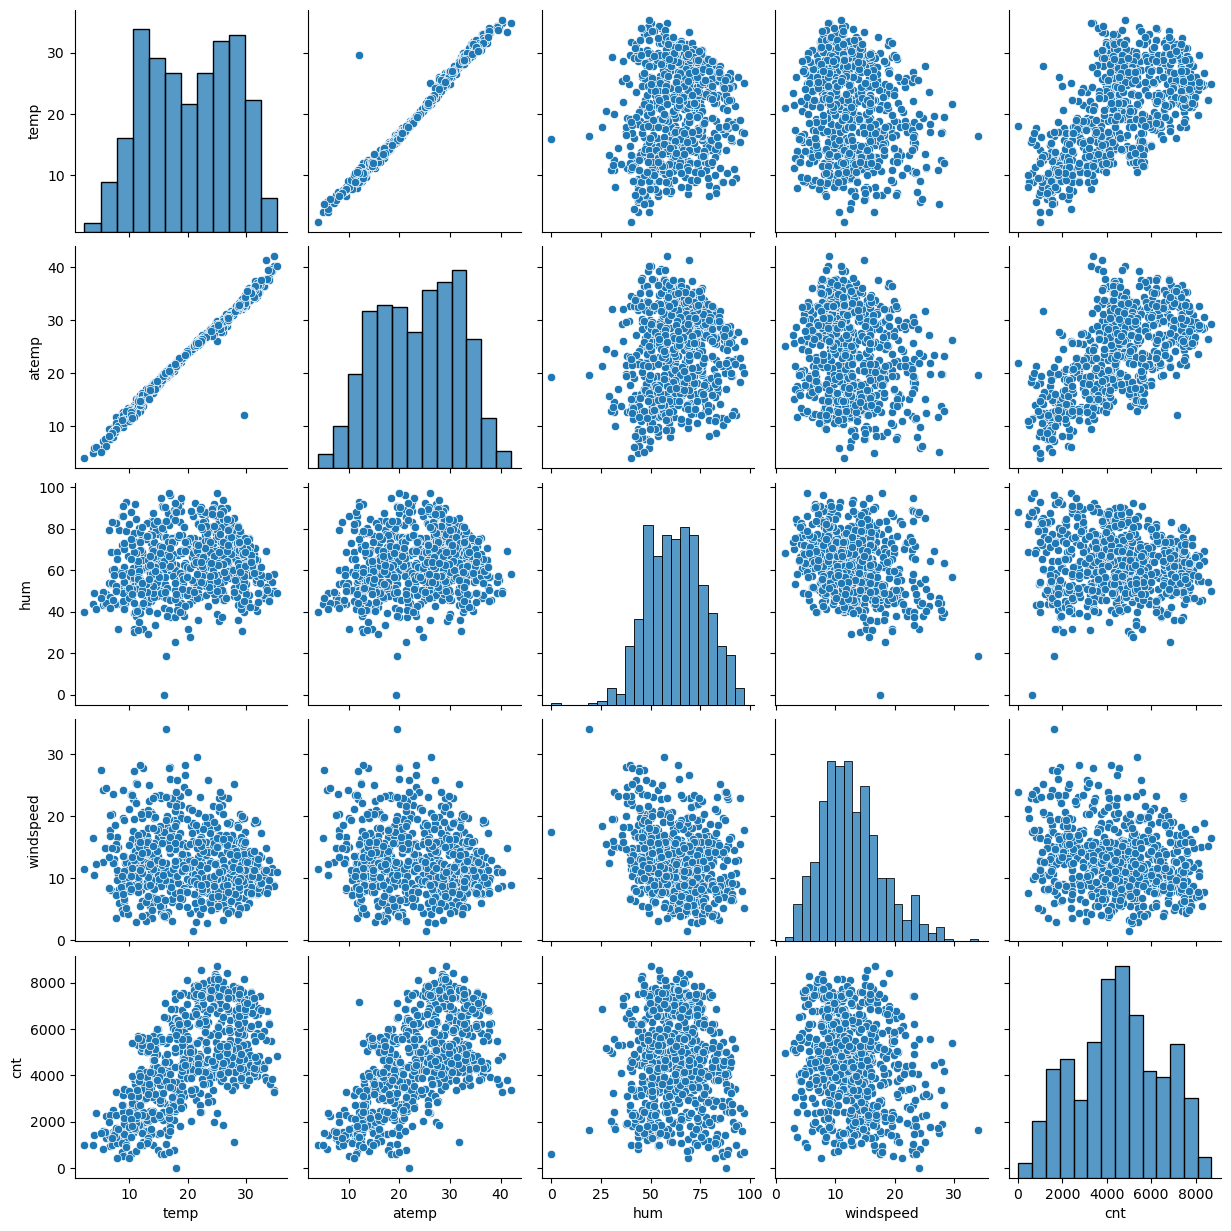

In [23]:
# Plotting Pairplot for numerical Data
plt.figure(figsize=[10,10])
sns.pairplot(data[num])
plt.show()

In [24]:
#  Correlation Matrix
correlation_matrix = data[num].corr()
correlation_matrix

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


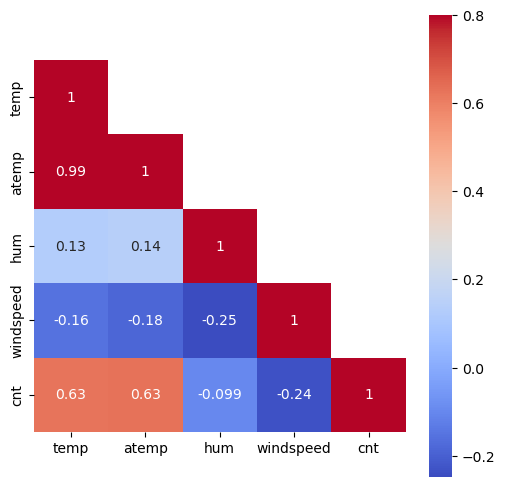

In [25]:
# plottiong heatmap for better visualization
mask = np.array(correlation_matrix)
# mask out the lower triangle
mask[np.tril_indices_from(mask)] = False
# mask out the upper triangle
# mask[np.triu_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(correlation_matrix, mask=mask, vmax=.8, square=True, annot=True, ax=ax, cmap= 'coolwarm' )
plt.show()

>>## Observations:
>>> - temp is highly correlated with atemp so its advisable to drop atemp column

>> - 'dteday' and 'instant' columns are also unnecessary for our analysis so I am dropping them
>> - Also 'casual' and 'registered' columns are add up to 'cnt' so I'm dropping them too

In [26]:
# Dropping the unnecessaey columns
unnecessary_cols = ['atemp','dteday','instant','registered','casual']
data = data.drop(unnecessary_cols,axis=1)

In [27]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Wed,1,B,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Thu,1,B,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Fri,1,A,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Sat,1,A,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Sun,1,A,9.305237,43.6957,12.522300,1600


# Step 2- Preparing the data for modeling

>## Creating Dummies

In [28]:
# Creating different levels of dummies based on Categorical columns 

data_cat = data.select_dtypes('object')
data_cat.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [29]:
# creating DataFrame of Dummies
dummies = pd.get_dummies(data_cat, drop_first=True , dtype='int')
dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Concating dummies with main dataset

data = pd.concat([data,dummies] , axis=1)

In [31]:
# Dropping the duplicate columns
data = data.drop(data_cat.columns , axis=1)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


>## Train Test Splitting

In [32]:
# Importing necessary Libraries
import sklearn
from sklearn.model_selection import train_test_split

In [33]:
# splitting the dataset into train and test datasets
df_train,df_test = train_test_split(data , train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


>## Rescaling the features
> - Normalization of Numerical Features
> - Normalized value = X - mim(X) / max(X) - min(X)

In [34]:
# Importing necessary Library
from sklearn.preprocessing import MinMaxScaler

In [35]:
# create a list of numerical vars
nums = ['temp','hum','windspeed','cnt']

# Instantiate an object
sc = MinMaxScaler()

# fitting and transforming train data
df_train[nums] = sc.fit_transform(df_train[nums])

In [36]:
# checking whether the data is normalized or not
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.086275,0.084314,0.080392,0.129412,0.143137,0.147059,0.152941,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.281045,0.278131,0.272166,0.335985,0.350557,0.354512,0.360284,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>#### - As we can see that min value is 0 and max value is 1 so all the numerical values are rescaled successfully

In [37]:
# Transforming Test dataset
df_test[nums] = sc.transform(df_test[nums])

In [38]:
# checking whether the data is normalized or not
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Wed,weathersit_B,weathersit_C
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.086364,0.172727,0.140909,0.131818,0.122727,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.281541,0.378873,0.348721,0.339064,0.328872,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3- Model Building

In [39]:
# Creating X and y variables for train dataset
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
# Creating X and y variables for test dataset
y_test = df_test.pop('cnt')
X_test = df_test

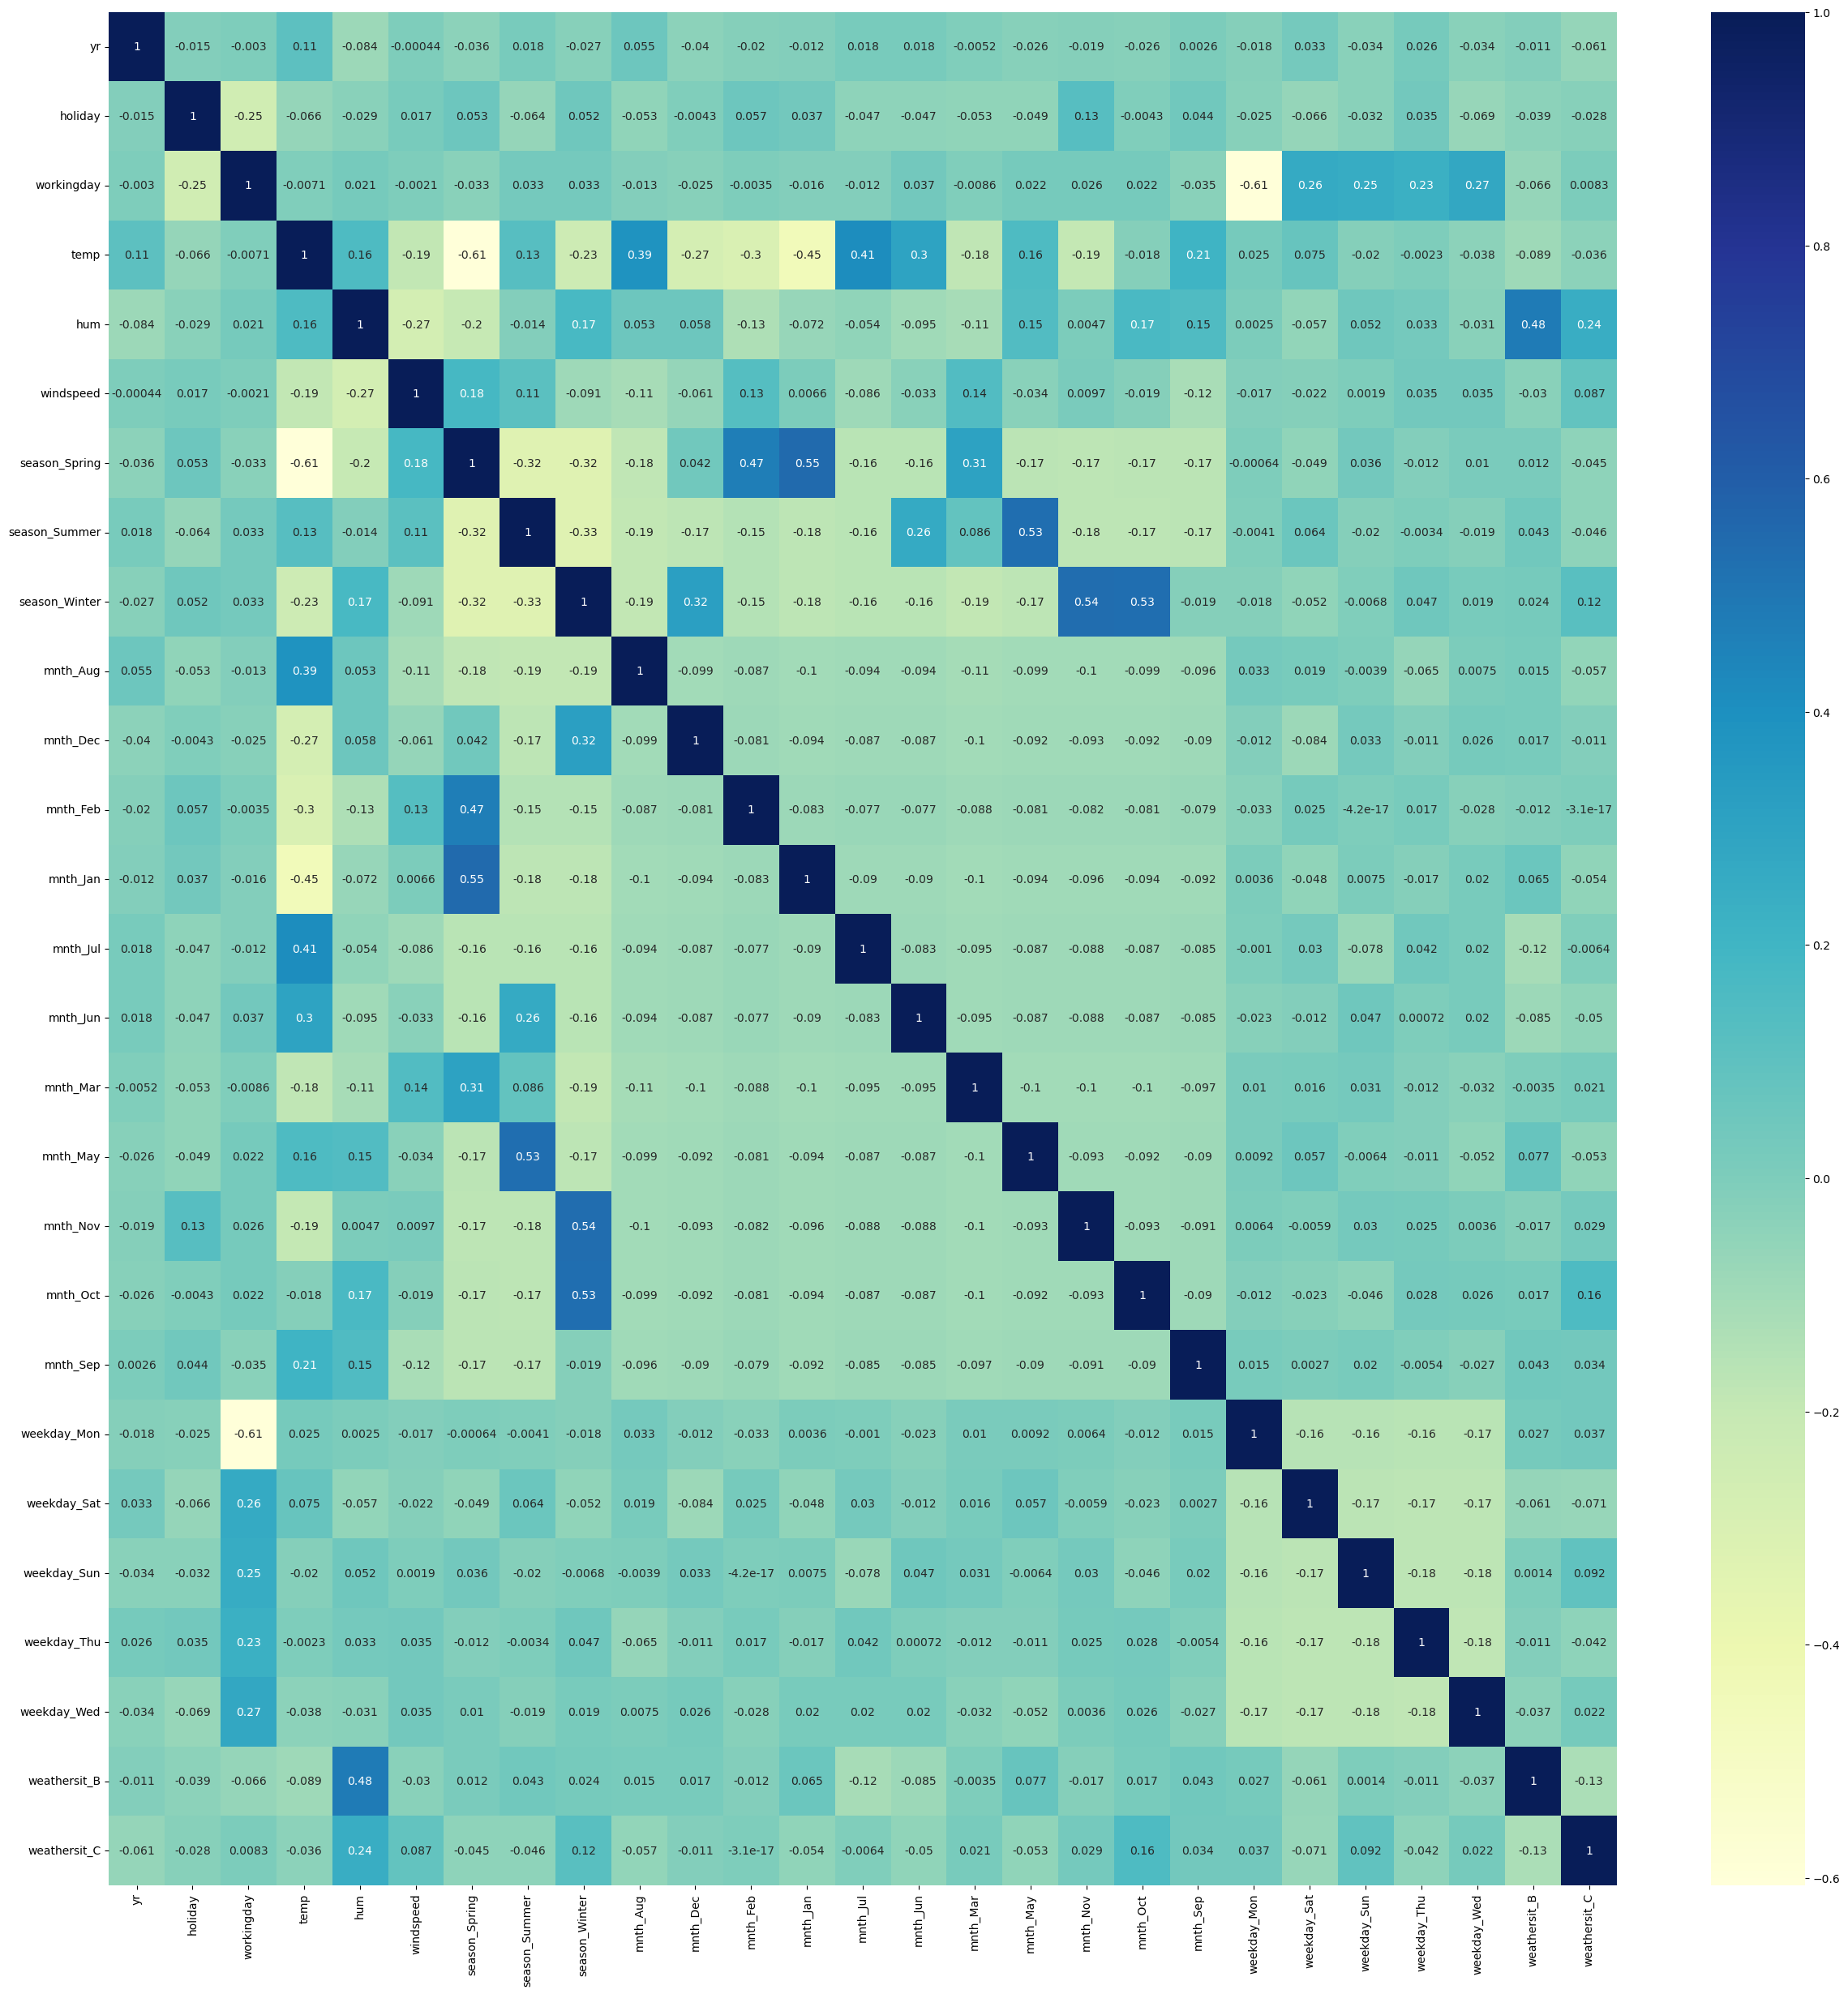

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

>> As we can see that 'temp' seems correlated to 'cnt'

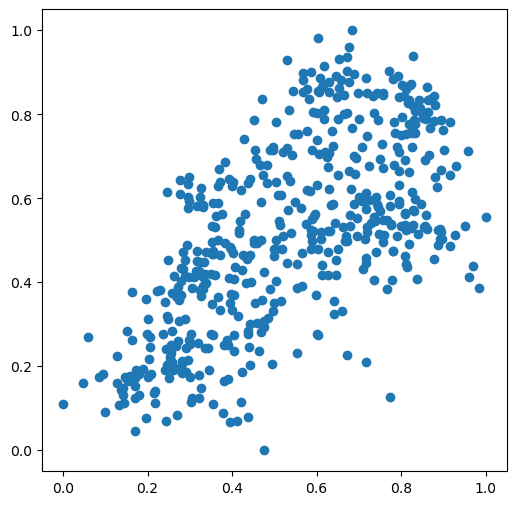

In [42]:
# Let's see a scatter for temp vs cnt.
plt.figure(figsize=[6,6])
plt.scatter(X_train['temp'], y_train)
plt.show()

### Let's start building our 1st multiple Linear regression model using all the features

In [43]:
# Importing library
import statsmodels.api as sm  

# Adding constant
X_train_cnst = sm.add_constant(X_train)

# Running the linear model
lm = sm.OLS(y_train,X_train_cnst).fit()   

# Checking the summary of our model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.54e-179
Time:                        13:13:33   Log-Likelihood:                 522.82
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     482   BIC:                            -871.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3413      0.045      7.655

> - <b> The model is having an R-squared value of 85.0%, indicating a strong fit. However, several features are deemed insignificant, with p-values exceeding 0.05. Therefore, it would be prudent to eliminate these features from the analysis.
> - <b>We will use Recursive Feature Elimination (RFE) to remove several columns from the data.

>## Recursive Feature Elimination (RFE)
>> -  we will select top 15 columns using RFE

In [44]:
# Importing necessary Library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
# Fitting the model
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', False, 8),
 ('weekday_Sun', False, 9),
 ('weekday_Thu', False, 3),
 ('weekday_Wed', False, 4),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [47]:
# checking the important columns
impcol = X_train.columns[rfe.support_]
impcol

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [48]:
# Dropping the columns that are not important
X_train_rfe = X_train[impcol]

### Building 2nd Model

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_cnst).fit()   

# Checking the summary of our model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          8.15e-189
Time:                        13:13:34   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

> -  This model has a R-squared value of **84.5%** which is quite good. But still there might be some features having multicollinearity we have to remove them
> -  To check multicollinearity we will check VIF value

>##  VIF (variance inflation factor)

In [50]:
# importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features    VIF
3             hum  30.89
2            temp  17.79
4       windspeed   4.72
5   season_Spring   4.37
7   season_Winter   4.06
6   season_Summer   2.82
13   weathersit_B   2.32
0              yr   2.09
11       mnth_Nov   1.85
9        mnth_Jan   1.75
10       mnth_Jul   1.59
8        mnth_Dec   1.56
12       mnth_Sep   1.41
14   weathersit_C   1.28
1         holiday   1.06


>> -  The feature *'hum'* has a VIF value of 28.03, indicating potential multicollinearity. It is recommended to exclude this feature from the analysis to address the issue.

In [52]:
# Dropping hum
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

### Building 3rd Model

In [53]:
# Adding constant
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train , X_train_cnst).fit()

# Checking the summary
print(lm.summary())

print('\n\n')
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          4.75e-186
Time:                        13:13:34   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

>> - Among all the features *'mnth_Nov'* is highly insignificant so it better to remove it

In [54]:
# Dropping mnth_Nov
X_train_rfe = X_train_rfe.drop(['mnth_Nov'],axis=1)

### Building 4th Model 

In [55]:
# Adding constant
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train , X_train_cnst).fit()

# Checking the summary
print(lm.summary())

print('\n\n')
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.74e-186
Time:                        13:13:34   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310

>> - Among all the features, *'mnth_Dec'* is the least significant and should be considered for removal.

In [56]:
# Dropping mnth_Dec
X_train_rfe = X_train_rfe.drop(['mnth_Dec'],axis=1)

### Building 5th Model

In [57]:
# Adding constant
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train , X_train_cnst).fit()

# Checking the summary
print(lm.summary())

print('\n\n')
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          8.14e-187
Time:                        13:13:35   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

>> - Among all the features, *'mnth_Jan'* is the least significant and should be considered for removal.

In [58]:
# Dropping mnth_Dec
X_train_rfe = X_train_rfe.drop(['mnth_Jan'],axis=1)

### Building 6th Model

In [59]:
# Adding constant
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train , X_train_cnst).fit()

# Checking the summary
print(lm.summary())

print('\n\n')
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          5.06e-187
Time:                        13:13:35   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

>> - Among all the features, *'season_Summer'* has a very low coefficient, indicating minimal contribution to the model. Therefore, it is advisable to drop this feature to enhance model efficiency.

In [60]:
# Dropping season_Summer
X_train_rfe = X_train_rfe.drop(['season_Summer'],axis=1)

### Building 7th Model

In [61]:
# Adding constant
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train , X_train_cnst).fit()

# Checking the summary
print(lm.summary())

print('\n\n')
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.10e-186
Time:                        13:13:35   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2531      0.024     10.569

>> - In this model, all features are highly significant, with Variance Inflation Factor (VIF) values below 5. However, the feature *'temp'* has a VIF of 4.61. To further reduce multicollinearity and reduce complexity of our model, we will analyze the correlation between the features and remove those features with high collinearity

<Axes: >

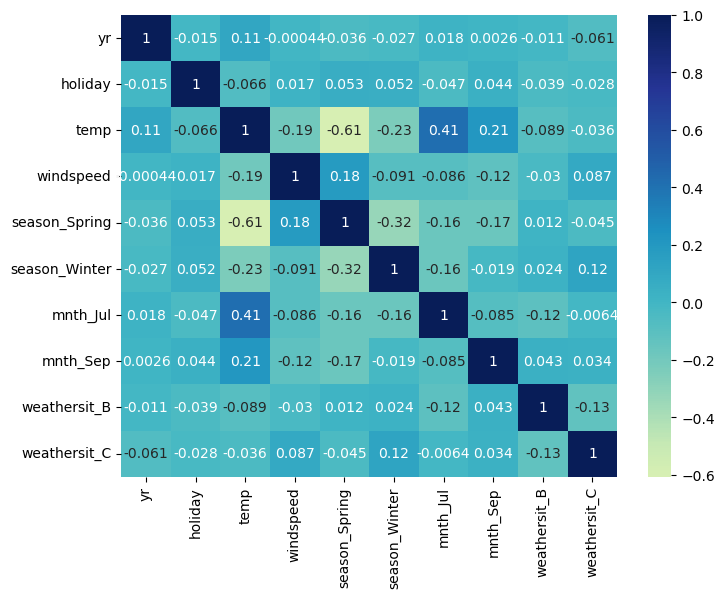

In [62]:
# Checking correlation between features
plt.figure(figsize=[8,6])
sns.heatmap(X_train_rfe.corr() , annot=True , cmap='YlGnBu' , center=0.0)

>> - The variables 'season_Spring' and 'mnth_Jul' exhibit a high correlation with 'temp.' However, since 'season_Spring' has a higher coefficient value so its more valuable feature for our model, it will be retained in the model, and 'mnth_Jul' will be excluded.

In [63]:
# Dropping mnth_Jul
X_train_rfe = X_train_rfe.drop(['mnth_Jul'],axis=1)

### Building 8th Model

In [64]:
# Adding constant
X_train_cnst = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train , X_train_cnst).fit()

# Checking the summary
print(lm.summary())

print('\n\n')
# checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          9.17e-184
Time:                        13:13:36   Log-Likelihood:                 485.35
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     500   BIC:                            -908.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2684      0.024     11.159

## Observations:
>> - **R-squared (0.826):**
>>  >The model explains **82.6%** of the variance in bike demand, which is strong. This indicates the chosen features are significant predictors.
>> - **Adjusted R-squared (0.823):**
>>  >This value is slightly lower but still high, showing the model generalizes well without overfitting.
>> - All the features are highly significant having P-value less than 0.001  
>> - All the features are having VIF value less than 5 so there is no multicollinearity
>> - This model is explaining most of the variance without being too complex. So let's proceed with this model.


# Step 4- Residual Analysis

In [65]:
# Predicting values for Y-train
y_train_pred = lm.predict(X_train_cnst)
res = y_train - y_train_pred

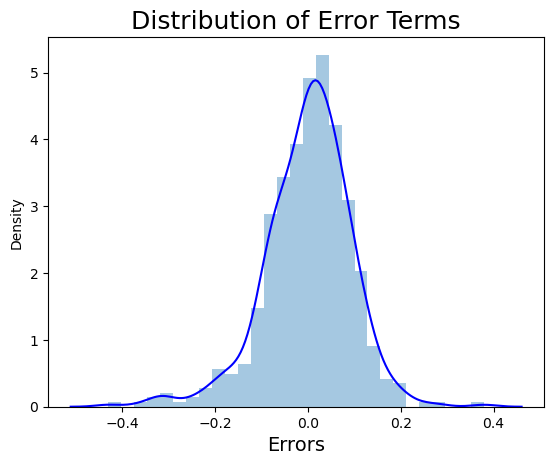

In [66]:
# Plotting a distribution chart for residuals
sns.distplot(res,kde_kws={'color':'blue'})
plt.title('Distribution of Error Terms', fontsize = 18)    
plt.xlabel('Errors', fontsize = 14)   
plt.show()

>### Observations:
>> - Residuals are normally distributed and are symmetrically centered around zero. 

<function matplotlib.pyplot.show(close=None, block=None)>

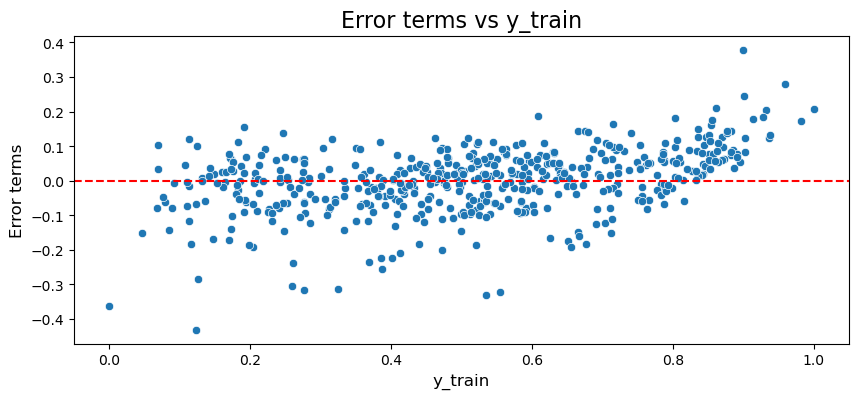

In [67]:
# plotting error terms with y_train
plt.figure(figsize=[10,4])
sns.scatterplot(y=res , x=y_train)
plt.axhline(0,color='red',linestyle = '--')
plt.title('Error terms vs y_train',fontdict={'size':16})
plt.xlabel('y_train',fontdict={'size':12})
plt.ylabel('Error terms',fontdict={'size':12})
plt.show

>### Observations:
>> - There is no observable pattern among the error terms, indicating that the error terms are independent of one another.
>> - The error terms demonstrate constant variance, indicating that they exhibit homoscedasticity.

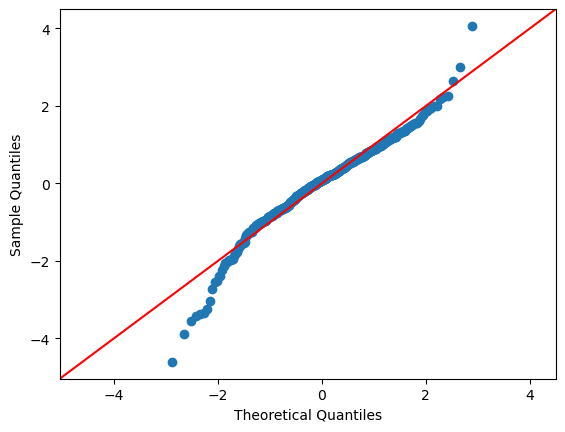

In [68]:
# plotting the QQ plot
sm.qqplot(y_train - y_train_pred,  line='45', fit=True)
plt.show()

>> - The QQ plot indicates that the residuals are reasonably normally distributed.

# Step 5- Making prediction on the test set

In [69]:
# Keeping necessary variables
variables = X_train_rfe.columns
variables

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [70]:
X_test = X_test[variables]

In [71]:
X_test.head()

,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Sep,weathersit_B,weathersit_C
184,0,1,0.831783,0.084219,0,0,0,1,0
535,1,0,0.901354,0.153728,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0


In [72]:
# adding constant 
X_test_sm = sm.add_constant(X_test)

# Predicting Values for test dataset
y_test_pred = lm.predict(X_test_sm)

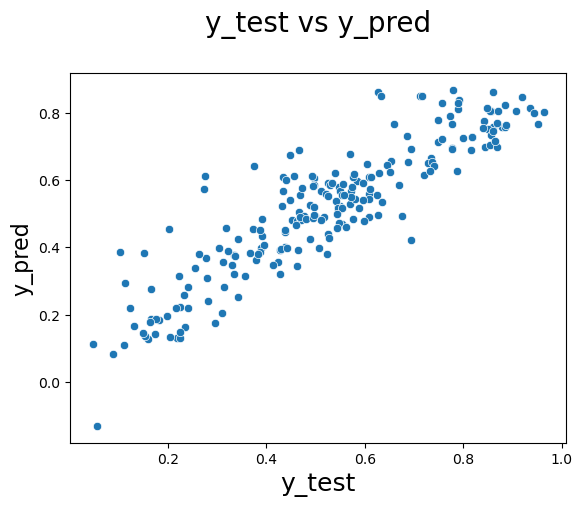

In [73]:
# Creating Scatter plot between y_test and y_pred values
sns.scatterplot(x = y_test, y = y_test_pred )
plt.title('y_test vs y_pred\n', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## Observation: 
>> - we can see a strong positive linear relationship between the predicted values of y (y_pred) and the actual values of y from the test dataset (y_test).
>> - That means our linear regression model is well-performing and capable of making accurate predictions on the test data.

# Step 6- Model Evaluation

- lets check r-squared values for test data set and compare it with train dataset

In [74]:
# Importing necessary Library
from sklearn.metrics import r2_score

In [75]:
# checking r2 score for test dataset
r2_test = r2_score(y_true=y_test , y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train , y_pred=y_train_pred)

In [76]:
# r2 value for test dataset in percentage
(r2_test)*100 

80.45486380321802

In [77]:
# r2 value for train dataset in percentage
(r2_train)*100

82.63635708245728

In [78]:
#  Difference between r2 values of test and train datasets
abs((r2_test-r2_train))

0.02181493279239255

>### Observetions:
>> - R-squared value for test dataset is **80.45%** and for train dataset its **82.63%**
>> - The difference between r2 scores of train and test datasets is **2.1%** which is quite Good


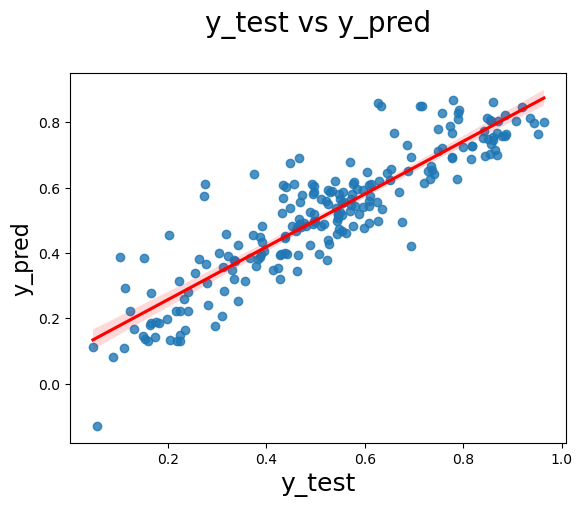

In [79]:
# Creating reg plot
sns.regplot(x = y_test, y = y_test_pred,line_kws={'color':'red'} )
plt.title('y_test vs y_pred\n', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## Observation:
>> - <b> We observe that the variance of the residuals (error terms) remains consistent across predictions, meaning the error term does not fluctuate significantly as the value of the predictor variable changes.

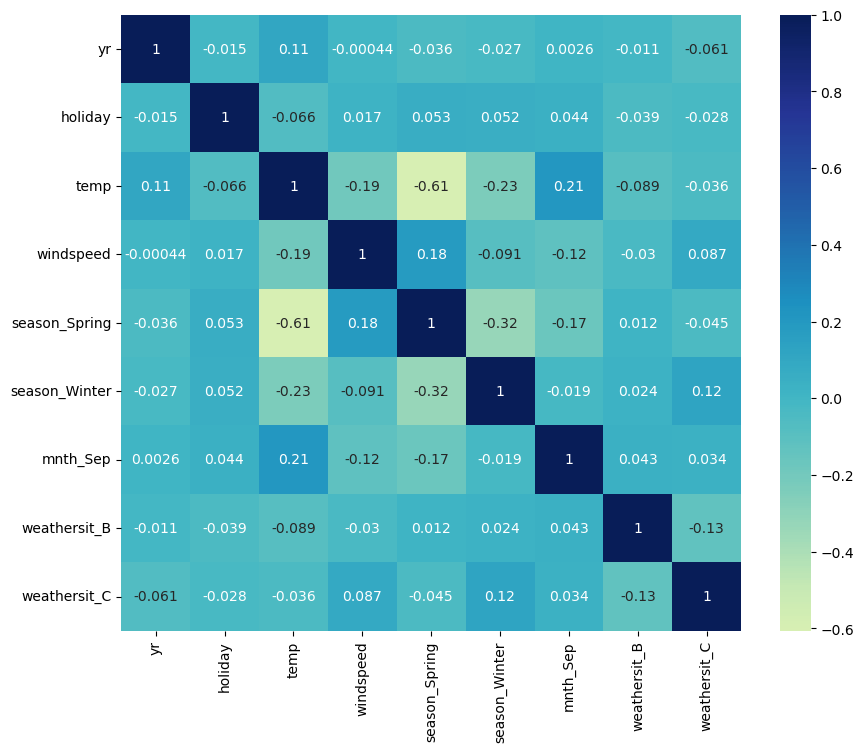

In [80]:
# checking the correlation between final predictor features
plt.figure(figsize=[10,8])
sns.heatmap(X_train_rfe.corr() , annot=True , cmap='YlGnBu' , center=0.0)
plt.show()

In [81]:
# printing summary of model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          9.17e-184
Time:                        13:13:40   Log-Likelihood:                 485.35
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     500   BIC:                            -908.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2684      0.024     11.159

# <b>Conclusion:

### Significant variables to predict the demand for shared bikes

- Year(yr)
- Holiday
- Temperature(temp)
- windspeed
- season_Spring
- season_Winter
- mnth_Sep
- weathersit_B( Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
- weathersit_C( Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

### Key Insights:
<b> - Positive Contributors to Demand:</b>

> 1. **Temperature:** Warmer days significantly increase bike demand.
> 2. **Year (2019):** Increased popularity of bike-sharing services led to higher demand.
> 3. **Winter Season:** Contrary to expectations, bike rentals slightly increase in winter, possibly due to holiday activities.
> 4. **Month (September):** A noticeable spike in demand during this month indicates peak usage.

<b> - Negative Contributors to Demand:</b>

> 1. **Holidays:** Demand decreases on holidays, indicating fewer casual commuters or riders.
> 1. **High Wind Speed:** Adverse wind conditions reduce bike usage.
> 2. **Spring Season:** Lower demand compared to other seasons.
> 3. **Poor Weather Conditions:** Mist, rain, and snow significantly deter users.

### Business Implications:
**1. Seasonal Strategies:** Focus marketing campaigns and bike availability during high-demand months and seasons (e.g., Summer and Fall).

**2. Targeted Promotions:** Boost demand during holidays with special offers to attract casual riders. Leverage September’s peak demand with promotions and increased bike availability.

**3. Weather-Driven Planning:** Adjust operations during adverse weather conditions, offering incentives to boost demand.
